In [1]:
# Disable jedi autocompleter
%config Completer.use_jedi = False

In [6]:
%%system?

Docstring:
Shell execute - run shell command and capture output (!! is short-hand).

%sx command

IPython will run the given command using commands.getoutput(), and
return the result formatted as a list (split on '\n').  Since the
output is _returned_, it will be stored in ipython's regular output
cache Out[N] and in the '_N' automatic variables.

Notes:

1) If an input line begins with '!!', then %sx is automatically
invoked.  That is, while::

  !ls

causes ipython to simply issue system('ls'), typing::

  !!ls

is a shorthand equivalent to::

  %sx ls

2) %sx differs from %sc in that %sx automatically splits into a list,
like '%sc -l'.  The reason for this is to make it as easy as possible
to process line-oriented shell output via further python commands.
%sc is meant to provide much finer control, but requires more
typing.

3) Just like %sc -l, this is a list with special attributes:
::

  .l (or .list) : value as list.
  .n (or .nlstr): value as newline-separated string.
  .s (or 

In [2]:
import math

In [8]:
math.sin(2)

0.9092974268256817

In [9]:
math.cos(2)

-0.4161468365471424

In [56]:
%xmode Context

def sqre_func(x:list) -> list:
    a = []
    for i in x:
        a.append(i ** 2)
    assert len(a)-1 == len(x)
    return a

print(sqre_func([1,2,3]))

Exception reporting mode: Context


AssertionError: 

In [60]:
%%time  

# %%time executes the timer on multi line statements with a single execution
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 145 ms, sys: 2.24 ms, total: 148 ms
Wall time: 147 ms


In [62]:
%%timeit
# %%timeit executes the timer on multi line statements repeatedly
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

73 ms ± 700 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
average result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
Thi

In [3]:
%prun?

Docstring:
Run a statement through the python code profiler.

Usage, in line mode:
  %prun [options] statement

Usage, in cell mode:
  %%prun [options] [statement]
  code...
  code...

In cell mode, the additional code lines are appended to the (possibly
empty) statement in the first line.  Cell mode allows you to easily
profile multiline blocks without having to put them in a separate
function.

The given statement (which doesn't require quote marks) is run via the
python profiler in a manner similar to the profile.run() function.
Namespaces are internally managed to work correctly; profile.run
cannot be used in IPython because it makes certain assumptions about
namespaces which do not hold under IPython.

Options:

-l <limit>
  you can place restrictions on what or how much of the
  profile gets printed. The limit value can be:

     * A string: only information for function names containing this string
       is printed.

     * An integer: only these many lines are printed.

     *

In [1]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [2]:
%prun sum_of_lists(100000)

         402 function calls (394 primitive calls) in 0.068 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.020    0.020    0.044    0.044 asyncio.py:200(_handle_events)
        6    0.012    0.002    0.012    0.002 socket.py:621(send)
        1    0.006    0.006    0.006    0.006 {method 'control' of 'select.kqueue' objects}
        2    0.006    0.003    0.007    0.003 {method 'recv' of '_socket.socket' objects}
        2    0.006    0.003    0.006    0.003 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.006    0.006    0.006    0.006 {method 'send' of '_socket.socket' objects}
      2/1    0.004    0.002    0.011    0.011 {built-in method builtins.exec}
        1    0.004    0.004    0.004    0.004 3519952779.py:1(sum_of_lists)
        5    0.002    0.000    0.002    0.000 {built-in method builtins.sum}
        1    0.001    0.001    0.011    0.011 <string>:1(<module>)
      4/3    0.000 

In [6]:
%load_ext line_profiler

In [9]:
%lprun -f sum_of_lists sum_of_lists(5000)

Timer unit: 1e-09 s

Total time: 0.008954 s
File: /var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_74516/3519952779.py
Function: sum_of_lists at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sum_of_lists(N):
     2         1       2000.0   2000.0      0.0      total = 0
     3         6       2000.0    333.3      0.0      for i in range(5):
     4     25005    8796000.0    351.8     98.2          L = [j ^ (j >> i) for j in range(N)]
     5         5     153000.0  30600.0      1.7          total += sum(L)
     6         1       1000.0   1000.0      0.0      return total

In [3]:
import numpy as np

In [31]:
l = [1,2,'yes', 4.0]
print(type(l))
print(l)

<class 'list'>
[1, 2, 'yes', 4.0]


In [30]:
l1 = np.array(l)
print(type(l1))
print(l1) # since numpy is constrained to arrays that should contain the same type of objects, its upcasting the objects to str

<class 'numpy.ndarray'>
['1' '2' 'yes' '4.0']


In [15]:
py_list = [1, 2, 3, 4, 5]
print(py_list * 2)

py_np_list = np.array([1,2,3,4,5])
print(py_np_list * 2)


[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[ 2  4  6  8 10]


In [24]:
from io import BytesIO

# Create a buffer
buffer = BytesIO()

# Write to the buffer
buffer.write(b"Hello, ")
# print(buffer)
buffer.write(b"World!")

# Read from the buffer
buffer.seek(0)  # Reset position to the beginning
content = buffer.read()

print(content)  # Output: b'Hello, World!'

b'Hello, World!'


In [40]:
np.empty(5)

array([1.e-323, 2.e-323, 3.e-323, 4.e-323, 5.e-323])

In [45]:
np.array(l)[::-1]

array(['4.0', 'yes', '2', '1'], dtype='<U32')

In [53]:
# Comparing time efficiency of initializing an empty numpy array vs using an uninitialized array using np.empty()

np.random.seed(0)

def compute_reciprocals_npempty(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

def compute_reciprocals_empty(values):
    output = np.ones(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

big_array = np.random.randint(1, 100, 1000000)


In [55]:
%timeit compute_reciprocals_npempty(big_array)

%timeit compute_reciprocals_empty(big_array)

576 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
570 ms ± 3.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
%timeit (1.0 / big_array)

522 μs ± 10.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [97]:
mean = [0, 0]
cov = [[1 ,2],
       [2, 5]]

X = np.random.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [98]:
X

array([[ 0.15289004,  0.89241647],
       [-0.17847669,  0.89340564],
       [-1.12159106, -3.6957222 ],
       [-1.38906356, -3.97492918],
       [ 0.88074683,  2.91776481],
       [-2.26417091, -5.08027704],
       [-0.31766034, -1.6049395 ],
       [ 1.05427001,  0.33335531],
       [ 0.56712215,  2.31351566],
       [ 0.51261425, -0.09732943],
       [ 1.41689215,  3.31716361],
       [-0.65351552,  0.44701615],
       [-0.12327997, -1.24666732],
       [ 0.27728842, -0.47314158],
       [ 0.33754203,  0.66406522],
       [-0.6587694 , -1.59146068],
       [ 0.89443317,  1.45595964],
       [ 0.04539521,  0.59257342],
       [-0.63035136, -0.26339097],
       [ 0.98066791,  1.54167106],
       [ 1.56983959,  2.35348446],
       [ 1.15745983,  5.40128888],
       [-0.6488004 ,  0.1478656 ],
       [-0.02044474,  0.25416311],
       [ 0.62104376,  2.21134222],
       [ 0.09098585,  1.15317594],
       [-0.12037773, -0.41123759],
       [-0.91700382, -0.98814608],
       [-0.54706578,

In [105]:
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)


In [107]:
i = np.searchsorted(bins, x) 

In [112]:
i

array([11, 10, 11,  7,  7, 12,  9, 11, 12,  9,  8, 12, 13,  9, 12,  5,  9,
       10, 14, 11, 11, 13,  7,  7, 11, 13, 14, 11, 12, 15,  9,  8, 12, 11,
        9,  9, 12, 13,  9, 11,  6, 13, 12,  7, 10, 10, 10, 10, 12,  9,  9,
       11,  8,  7, 10, 12, 11,  8,  8, 11,  9, 11, 12, 10,  7, 10, 11, 11,
        8, 11, 10, 10, 11,  6, 10, 14, 10, 12,  9,  6, 11, 11, 10,  8, 12,
       13, 10, 12,  9, 10, 12, 11,  7, 10,  8, 10,  9, 10, 12, 14])

In [113]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [116]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [122]:
np.add.at(counts, i, 1)
counts, bins

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  9., 24., 24., 42., 57., 60., 48.,
        18., 12.,  3.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

In [125]:
np.histogram(x, bins)

(array([ 0,  0,  0,  0,  1,  3,  8,  8, 14, 19, 20, 16,  6,  4,  1,  0,  0,
         0,  0]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

In [149]:
x = np.array([2,1,4,3,7,5,9,6])


def selection_sort_1(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        # print("swap position: ", swap)
        (x[i], x[swap]) = (x[swap], x[i])
        # print("sorted_list: ", x, "\n")
    return x

selection_sort_1(x)

array([1, 2, 3, 4, 5, 6, 7, 9])

In [142]:

def selection_sort_2(A):
    # Traverse through all array elements
    for i in range(len(A)-1):
        
        # Find the minimum element in remaining 
        # unsorted array
        min_idx = i
        for j in range(i+1, len(A)):
            if A[min_idx] > A[j]:
                min_idx = j
                
        # Swap the found minimum element with 
        # the first element        
        A[i], A[min_idx] = A[min_idx], A[i]
    
    # Driver code to test above
    # print ("Sorted array")

    return A

selection_sort_2(x)

array([1, 2, 3, 4, 5, 6, 7, 9])

In [143]:
%timeit selection_sort_1(x)
%timeit selection_sort_2(x)

5.68 μs ± 61.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.32 μs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [175]:
x = np.array([ 0,  1,  3, 8, 14, 19, 20, 16,  6,  4, 4, 54, 354, 32, 5325, 345, 4535])

def selection_sort(x):
    for i in range(len(x)):
        swap = np.argmin(x[i:])
        if x[i] > x[swap + i]:
            x[i], x[swap + i] = x[swap + i], x[i]
        # print("sorted_list: ", x, "\n", "new i: ", i+1)
        # x[i], x[swap] = x[swap], x[i]
    return x
        
selection_sort(x)

array([   0,    1,    3,    4,    4,    6,    8,   14,   16,   19,   20,
         32,   54,  345,  354, 4535, 5325])

In [176]:
%timeit selection_sort_1(x)
%timeit selection_sort_2(x)
%timeit selection_sort(x)

12 μs ± 86.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.6 μs ± 486 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11.1 μs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [203]:
x = np.array([3,4,1,5,2])
x[:-1]

array([3, 4, 1, 5])

In [204]:
def bogosort(x):
    i = 0
    while np.any(x[:-1] > x[1:]):
        i += 1
        np.random.shuffle(x)
    print(f"took {i} shuffles to sort. Complexity: {i ** (i/len(x))}")
    return x

In [205]:
bogosort(x)

took 91 shuffles to sort. Complexity: 4.5139146203920994e+35


array([1, 2, 3, 4, 5])

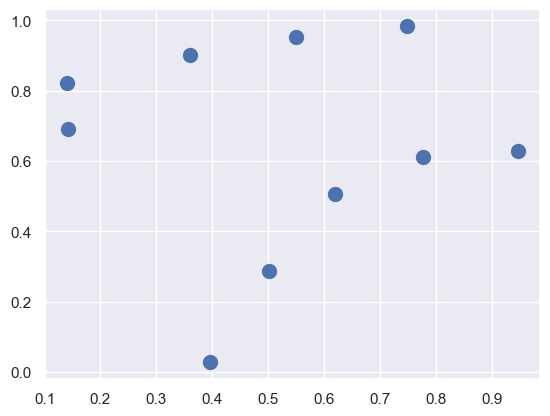

In [283]:
X = np.random.rand(10, 2)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1], s=100)

In [221]:
X[np.newaxis, :, :]

array([[[0.40545907, 0.97640284],
        [0.55326991, 0.96003731],
        [0.76808359, 0.96186107],
        [0.56708361, 0.17997534],
        [0.75284639, 0.83974545],
        [0.93939209, 0.85523741],
        [0.88232805, 0.85944155],
        [0.81877757, 0.42199462],
        [0.81827317, 0.40903753],
        [0.94681978, 0.80653788]]])

In [228]:
print(X[0])
print(X[1])
print(X[2])

[0.40545907 0.97640284]
[0.55326991 0.96003731]
[0.76808359 0.96186107]


In [232]:
X[:, np.newaxis, :].shape

(10, 1, 2)

In [234]:
X[np.newaxis, :, :].shape

(1, 10, 2)

In [242]:
X[np.newaxis, :, :] - X[:, np.newaxis, :]

array([[[ 0.00000000e+00,  0.00000000e+00],
        [ 1.47810839e-01, -1.63655227e-02],
        [ 3.62624519e-01, -1.45417708e-02],
        [ 1.61624533e-01, -7.96427498e-01],
        [ 3.47387319e-01, -1.36657391e-01],
        [ 5.33933012e-01, -1.21165424e-01],
        [ 4.76868973e-01, -1.16961282e-01],
        [ 4.13318496e-01, -5.54408220e-01],
        [ 4.12814094e-01, -5.67365306e-01],
        [ 5.41360705e-01, -1.69864953e-01]],

       [[-1.47810839e-01,  1.63655227e-02],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 2.14813680e-01,  1.82375194e-03],
        [ 1.38136937e-02, -7.80061976e-01],
        [ 1.99576480e-01, -1.20291868e-01],
        [ 3.86122173e-01, -1.04799901e-01],
        [ 3.29058134e-01, -1.00595759e-01],
        [ 2.65507657e-01, -5.38042698e-01],
        [ 2.65003255e-01, -5.50999783e-01],
        [ 3.93549866e-01, -1.53499430e-01]],

       [[-3.62624519e-01,  1.45417708e-02],
        [-2.14813680e-01, -1.82375194e-03],
        [ 0.00000000e+00,  0

In [244]:
X = np.random.rand(3,2)

In [245]:
X

array([[0.38978743, 0.73653346],
       [0.92778877, 0.18069629],
       [0.40946755, 0.38629417]])

In [282]:
((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(-1)

array([[0.        , 0.59840041, 0.12305487],
       [0.59840041, 0.        , 0.31092737],
       [0.12305487, 0.31092737, 0.        ]])

In [287]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [290]:
np.argsort(dist_sq, axis=1)

array([[0, 8, 6, 5, 4, 2, 7, 3, 1, 9],
       [1, 3, 9, 5, 7, 6, 4, 2, 8, 0],
       [2, 5, 6, 9, 1, 8, 3, 4, 0, 7],
       [3, 1, 7, 4, 9, 6, 5, 8, 2, 0],
       [4, 7, 3, 1, 6, 8, 5, 9, 0, 2],
       [5, 2, 6, 9, 1, 8, 3, 4, 7, 0],
       [6, 5, 8, 2, 1, 3, 9, 4, 0, 7],
       [7, 4, 3, 1, 6, 9, 8, 5, 2, 0],
       [8, 6, 0, 5, 4, 2, 3, 7, 1, 9],
       [9, 1, 5, 3, 2, 6, 7, 4, 8, 0]])

In [295]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [296]:
import pandas as pd
pd.DataFrame(A)

A    B
0  0  0.0
1  0  0.0
2  0  0.0

In [301]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 10, (2,2)), columns=list('ab'))

In [304]:
B = pd.DataFrame(rng.randint(0, 10, (3,3)), columns=list('bac'))

In [306]:
A

a  b
0  6  3
1  7  4

In [305]:
B

b  a  c
0  3  7  7
1  2  5  4
2  1  7  5

In [308]:
A.add(B, fill_value=0)

a    b    c
0  13.0  6.0  7.0
1  12.0  6.0  4.0
2   7.0  1.0  5.0

In [310]:
A

a  b
0  6  3
1  7  4

In [333]:
A = rng.randint(10, size=(3,4))

df = pd.DataFrame(A, columns=list('QRST'))

In [334]:
df

Q  R  S  T
0  2  4  2  6
1  4  8  6  1
2  3  8  1  9

In [335]:
halfrow = df.iloc[0, ::2]

In [336]:
halfrow

Q    2
S    2
Name: 0, dtype: int64

In [337]:
df - halfrow

Q   R    S   T
0  0.0 NaN  0.0 NaN
1  2.0 NaN  4.0 NaN
2  1.0 NaN -1.0 NaN

In [349]:
pd.array([1, 2, np.nan, None, pd.NA])

<IntegerArray>
[1, 2, <NA>, <NA>, <NA>]
Length: 5, dtype: Int64

In [385]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])

In [381]:
df[:, 3] = np.nan
df

0    1  2  (slice(None, None, None), 3)
0  1.0  NaN  2                           NaN
1  2.0  3.0  5                           NaN
2  NaN  4.0  6                           NaN

In [5]:
data = np.round(np.random.randn(4,6), 1)
data

array([[ 1.5,  1.7,  0.2,  0.2,  0.2, -0.2],
       [ 0.7,  0.5, -1.6, -1.5, -0.5, -1.2],
       [ 0.6,  0.3, -1.3, -0.2, -0.4,  0.2],
       [-2.5,  0. ,  2.1, -1.1, -0.2,  0.7]])

In [6]:
data[:, ::2] *= 10
data

array([[ 15. ,   1.7,   2. ,   0.2,   2. ,  -0.2],
       [  7. ,   0.5, -16. ,  -1.5,  -5. ,  -1.2],
       [  6. ,   0.3, -13. ,  -0.2,  -4. ,   0.2],
       [-25. ,   0. ,  21. ,  -1.1,  -2. ,   0.7]])

In [7]:
data += 37
data

array([[52. , 38.7, 39. , 37.2, 39. , 36.8],
       [44. , 37.5, 21. , 35.5, 32. , 35.8],
       [43. , 37.3, 24. , 36.8, 33. , 37.2],
       [12. , 37. , 58. , 35.9, 35. , 37.7]])

In [8]:
index = pd.MultiIndex.from_product([[2013, 2014], [1,2]], names=['year', 'visit'])
index

MultiIndex([(2013, 1),
            (2013, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])

In [9]:
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject' ,'type'])
columns

MultiIndex([(  'Bob',   'HR'),
            (  'Bob', 'Temp'),
            ('Guido',   'HR'),
            ('Guido', 'Temp'),
            (  'Sue',   'HR'),
            (  'Sue', 'Temp')],
           names=['subject', 'type'])

In [13]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      52.0  38.7  39.0  37.2  39.0  36.8
     2      44.0  37.5  21.0  35.5  32.0  35.8
2014 1      43.0  37.3  24.0  36.8  33.0  37.2
     2      12.0  37.0  58.0  35.9  35.0  37.7

In [25]:
health_data[('2013', '1'), 'Bob']

KeyError: (('2013', '1'), 'Bob')

In [56]:
health_data.loc[:, ('Guido', 'HR')]

year  visit
2013  1        39.0
      2        21.0
2014  1        24.0
      2        58.0
Name: (Guido, HR), dtype: float64

In [59]:
idx = pd.IndexSlice
health_data.loc[idx[2013,:], idx['Bob', :]]

subject      Bob      
type          HR  Temp
year visit            
2013 1      52.0  38.7
     2      44.0  37.5

In [65]:
pd.DataFrame(health_data.stack().stack()).reset_index().unstack()

/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/2706779889.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pd.DataFrame(health_data.stack().stack()).reset_index().unstack()


year  0     2013
      1     2013
      2     2013
      3     2013
      4     2013
            ... 
0     19    58.0
      20    35.0
      21    37.0
      22    35.9
      23    37.7
Length: 120, dtype: object

In [116]:
df = pd.DataFrame({'key' : ['A','B','C', 'D', 'E', 'F'],
              'data1' : [1,2,3, 3, 1, 0],
              'data2' : [4,5,6, 2,1,3]})

In [117]:
df

key  data1  data2
0   A      1      4
1   B      2      5
2   C      3      6
3   D      3      2
4   E      1      1
5   F      0      3

In [121]:
L = [1,2,1,0,2,9,]
for i in df.groupby(L):
    print(i,  "\n")

(0,   key  data1  data2
3   D      3      2) 

(1,   key  data1  data2
0   A      1      4
2   C      3      6) 

(2,   key  data1  data2
1   B      2      5
4   E      1      1) 

(9,   key  data1  data2
5   F      0      3) 



In [122]:
df.groupby(L).sum()

key  data1  data2
0   D      3      2
1  AC      4     10
2  BE      3      6
9   F      0      3

In [115]:

df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo'],
    'B': [1, 2, 3, 4, 5],
})

print(df)
# Create a Series for grouping
group_series = pd.Series([1, 1, 2, 2, 1])

# Group by the Series
grouped = df.groupby(group_series).sum()
print(grouped)

     A  B
0  foo  1
1  bar  2
2  foo  3
3  bar  4
4  foo  5
           A  B
1  foobarfoo  8
2     foobar  7


In [147]:
from datetime import datetime

In [148]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

In [149]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [156]:
dates.to_period('s')

PeriodIndex(['2015-07-03 00:00:00', '2015-07-04 00:00:00',
             '2015-07-06 00:00:00', '2015-07-07 00:00:00',
             '2015-07-08 00:00:00'],
            dtype='period[s]')

In [150]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [159]:
print('pandas date range: ', pd.date_range('2024-04-01', periods=8, freq='M'))
print('pandas period range: ', pd.period_range('2024-04-01', periods=8, freq='M'))

pandas date range:  DatetimeIndex(['2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
               '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30'],
              dtype='datetime64[ns]', freq='ME')
pandas period range:  PeriodIndex(['2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09',
             '2024-10', '2024-11'],
            dtype='period[M]')


/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/2766460127.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print('pandas date range: ', pd.date_range('2024-04-01', periods=8, freq='M'))


In [278]:
import yfinance as yf
ticker = yf.Ticker('GOOG')
start=pd.to_datetime('2004-08-19')
end=pd.to_datetime('2016-12-31')
# pass the parameters as the taken dates for start and end
goog = ticker.history(start=start, end=end)

In [196]:
# goog.index = goog.index.date
goog.index.name = 'Date'

In [197]:
goog

Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2004-08-19   2.487833   2.588839   2.387325   2.496292  897427216        0.0   
2004-08-20   2.512960   2.713729   2.500273   2.694573  458857488        0.0   
2004-08-23   2.755276   2.823193   2.712983   2.721690  366857939        0.0   
2004-08-24   2.767466   2.776422   2.576649   2.608991  306396159        0.0   
2004-08-25   2.611230   2.686860   2.584361   2.637103  184645512        0.0   
...               ...        ...        ...        ...        ...        ...   
2016-12-23  39.500051  39.591949  39.319257  39.450607   12468000        0.0   
2016-12-27  39.489063  39.847656  39.338085  39.532513   15782000        0.0   
2016-12-28  39.639893  39.666360  39.115488  39.207882   23076000        0.0   
2016-12-29  39.121982  39.251836  38.901732  39.095013   14886000        0.0   
2016-12-30  39.093014  39.094512  38.476715  38.547134   35400000        0.0   

            Stock Splits  
Date                      
2004-08-19           0.0  
2004-08-20           0.0  
2004-08-23           0.0  
2004-08-24           0.0  
2004-08-25           0.0  
...                  ...  
2016-12-23           0.0  
2016-12-27           0.0  
2016-12-28           0.0  
2016-12-29           0.0  
2016-12-30           0.0  

[3115 rows x 7 columns]

In [199]:
pd.date_range('2004-09-01', '2004-10-01')

DatetimeIndex(['2004-09-01', '2004-09-02', '2004-09-03', '2004-09-04',
               '2004-09-05', '2004-09-06', '2004-09-07', '2004-09-08',
               '2004-09-09', '2004-09-10', '2004-09-11', '2004-09-12',
               '2004-09-13', '2004-09-14', '2004-09-15', '2004-09-16',
               '2004-09-17', '2004-09-18', '2004-09-19', '2004-09-20',
               '2004-09-21', '2004-09-22', '2004-09-23', '2004-09-24',
               '2004-09-25', '2004-09-26', '2004-09-27', '2004-09-28',
               '2004-09-29', '2004-09-30', '2004-10-01'],
              dtype='datetime64[ns]', freq='D')

In [279]:
goog = goog['Close']

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<Axes: xlabel='Date'>

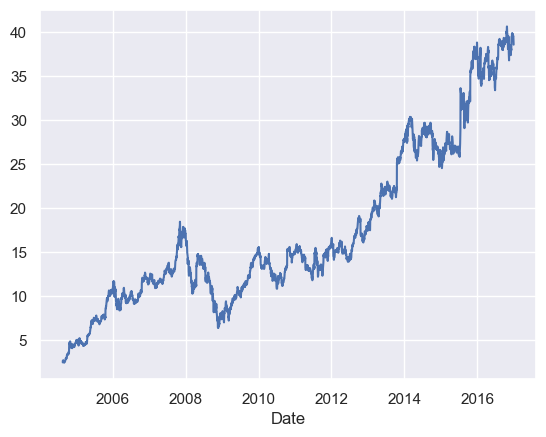

In [274]:
goog.plot()

/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/2981552620.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  goog.resample('BA').mean().plot(style=':')
/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/2981552620.py:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  goog.asfreq('BA').plot(style="--")


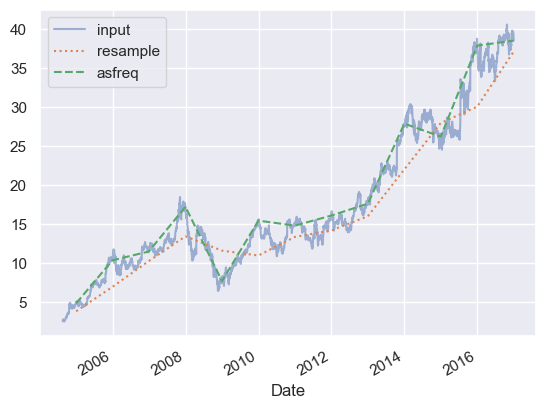

In [291]:
goog.plot(alpha=0.5, style="-")
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style="--")
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

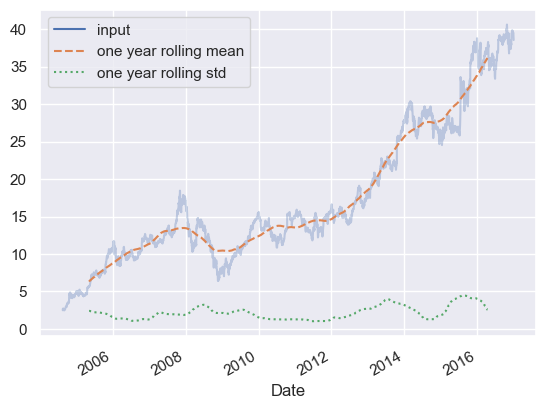

In [307]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one year rolling mean': rolling.mean(),
                    'one year rolling std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [317]:
data[data['one year rolling mean'].notnull()]

input  one year rolling mean  \
Date                                                          
2005-05-10 00:00:00-04:00   5.667284               6.321563   
2005-05-11 00:00:00-04:00   5.754110               6.344214   
2005-05-12 00:00:00-04:00   5.690173               6.364217   
2005-05-13 00:00:00-04:00   5.703109               6.383754   
2005-05-16 00:00:00-04:00   5.748139               6.402613   
...                              ...                    ...   
2016-04-07 00:00:00-04:00  36.971928              36.065242   
2016-04-08 00:00:00-04:00  36.915493              36.081473   
2016-04-11 00:00:00-04:00  36.763165              36.098170   
2016-04-12 00:00:00-04:00  37.112267              36.114657   
2016-04-13 00:00:00-04:00  37.543278              36.129670   

                           one year rolling std  
Date                                             
2005-05-10 00:00:00-04:00              2.405346  
2005-05-11 00:00:00-04:00              2.408151  
2005-05-12 00:00:00-04:00              2.408075  
2005-05-13 00:00:00-04:00              2.407369  
2005-05-16 00:00:00-04:00              2.404677  
...                                         ...  
2016-04-07 00:00:00-04:00              2.609848  
2016-04-08 00:00:00-04:00              2.612945  
2016-04-11 00:00:00-04:00              2.613399  
2016-04-12 00:00:00-04:00              2.613271  
2016-04-13 00:00:00-04:00              2.611456  

[2751 rows x 3 columns]

In [319]:
# Create a sample DataFrame
df = pd.DataFrame({'A': range(1, 6), 'B': range(10, 60, 10)})

# Using eval for a simple calculation
df['C'] = df.eval('A * B')

# More complex expression
df.eval('D = (A + B) / 2', inplace=True)

# Conditional expression
# df.eval('E = where(A > 3, A, B)', inplace=True)

print(df)

   A   B    C     D
0  1  10   10   5.5
1  2  20   40  11.0
2  3  30   90  16.5
3  4  40  160  22.0
4  5  50  250  27.5


In [320]:
import matplotlib.pyplot as plt
%matplotlib inline

Axes(0.125,0.11;0.775x0.35)


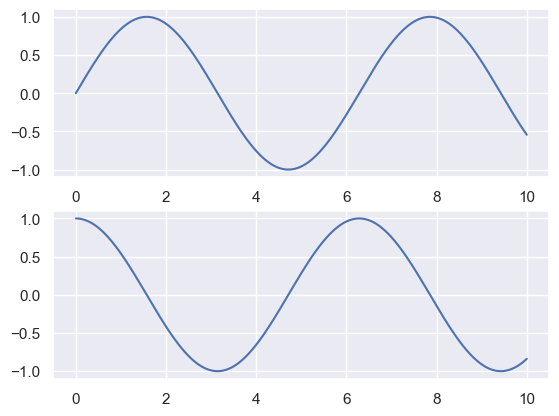

In [333]:
plt.figure() # create a plot figure

x = np.linspace(0,10,1000)

plt.subplot(2,1,1) # rows, columns, panel number
plt.plot(x, np.sin(x))

plt.subplot(2,1,2)
plt.plot(x, np.cos(x));

print(plt.gca())

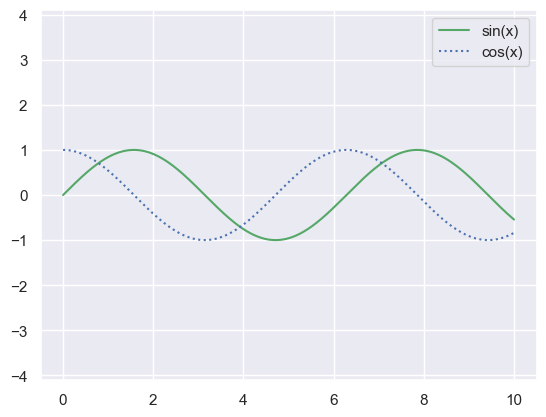

In [343]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

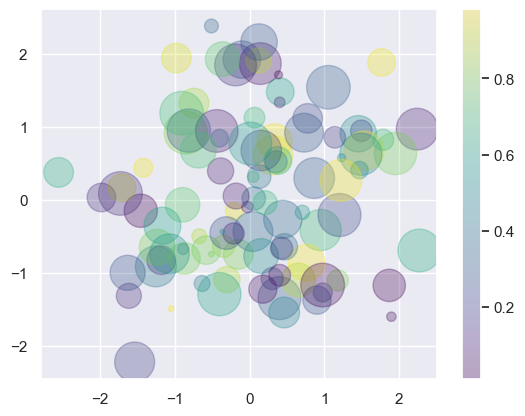

In [352]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

In [354]:
model = lambda x: x * np.sin(x)
model

<function __main__.<lambda>(x)>

In [403]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y*x) * np.cos(x)

x =  np.linspace(0,10,10)
y = np.linspace(0,10,5)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

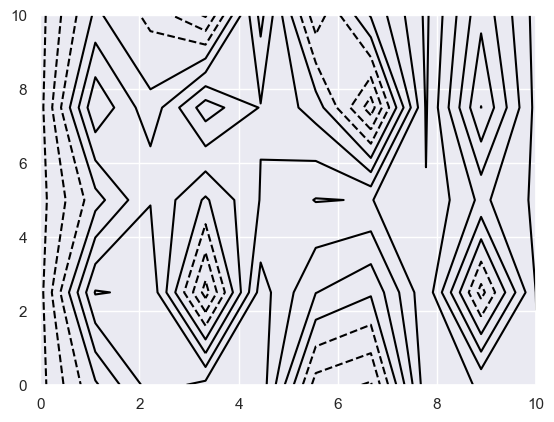

In [404]:
plt.contour(X, Y, Z, colors='black')

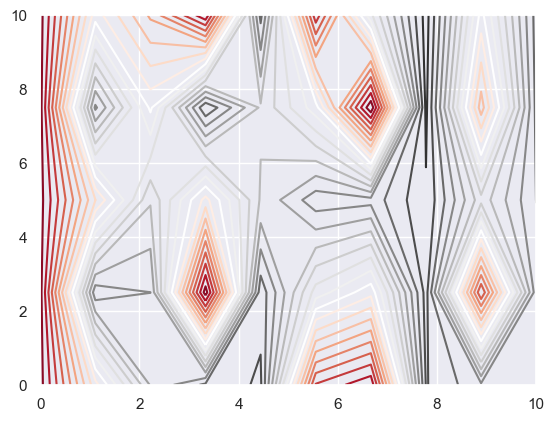

In [405]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

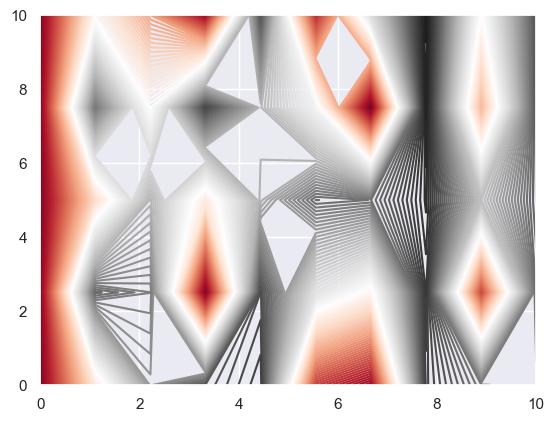

In [406]:
plt.contour(X, Y, Z, 100, cmap='RdGy')

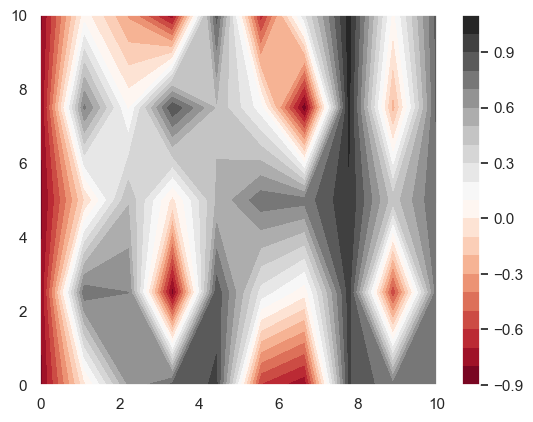

In [407]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

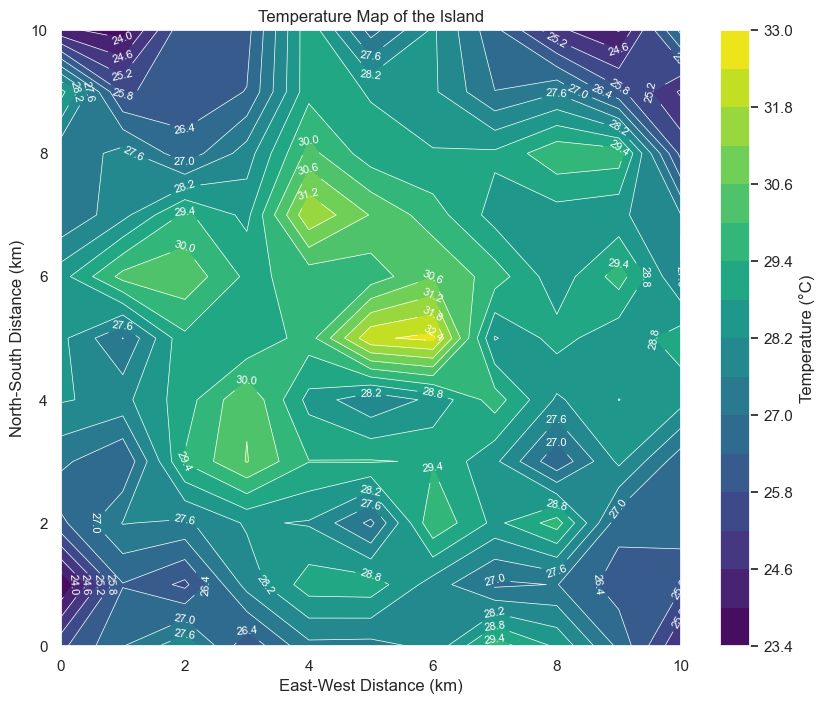

In [408]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create our "island" (a 10x10 grid)
x = np.linspace(0, 10, 11)
y = np.linspace(0, 10, 11)
X, Y = np.meshgrid(x, y)

# Step 2: Create temperature data (our z-values)
# Let's say the center of the island is warmest, and it gets cooler towards the edges
Z = 30 - (X - 5)**2/10 - (Y - 5)**2/10 + np.random.randn(11, 11)

# Step 3: Create the contour plot
plt.figure(figsize=(10, 8))

# Filled contour
cs = plt.contourf(X, Y, Z, levels=15, cmap='viridis')
plt.colorbar(cs, label='Temperature (°C)')

# Adding contour lines
cs2 = plt.contour(X, Y, Z, levels=15, colors='white', linewidths=0.5)
plt.clabel(cs2, inline=True, fontsize=8, fmt='%1.1f')

plt.title('Temperature Map of the Island')
plt.xlabel('East-West Distance (km)')
plt.ylabel('North-South Distance (km)')
plt.show()

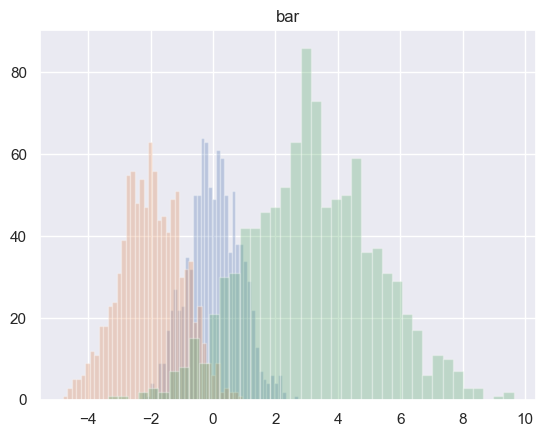

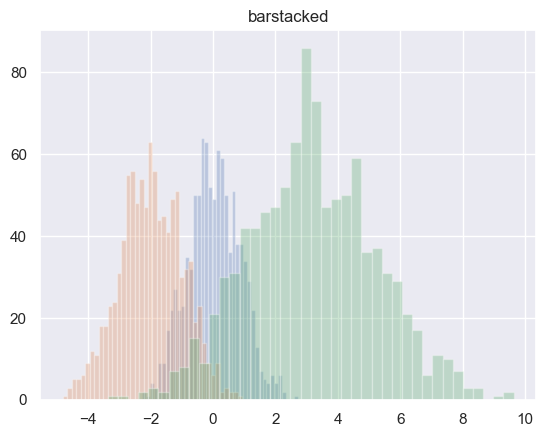

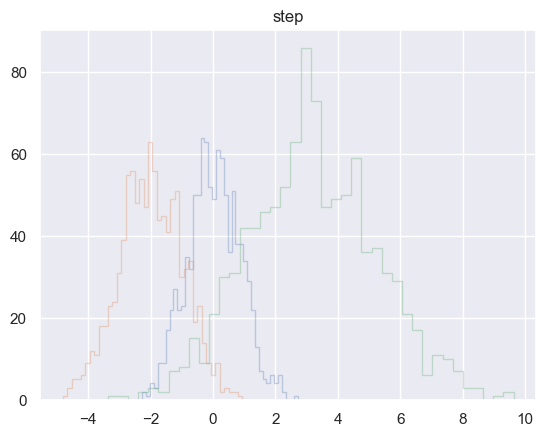

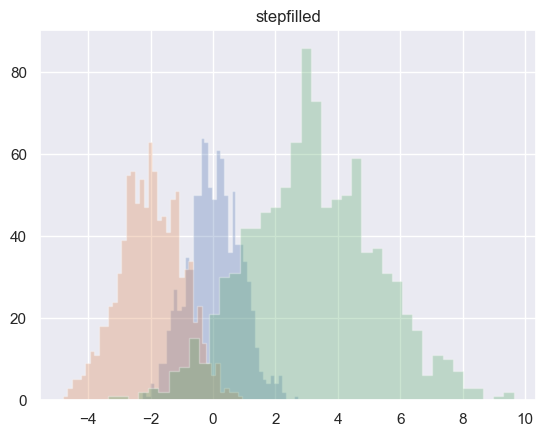

In [414]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

for x in ['bar', 'barstacked', 'step', 'stepfilled']:

    kwargs = dict(histtype=x, alpha=0.3, bins=40)

    plt.hist(x1, **kwargs)
    plt.hist(x2, **kwargs)
    plt.hist(x3, **kwargs)
    plt.title(x)
    plt.show();

In [415]:
mean = [0,0]
cov = [[1,1], [1,2]]
x,y = np.random.multivariate_normal(mean, cov, 10000).T

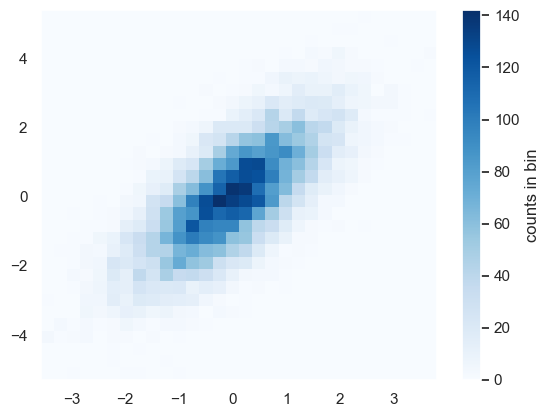

In [421]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

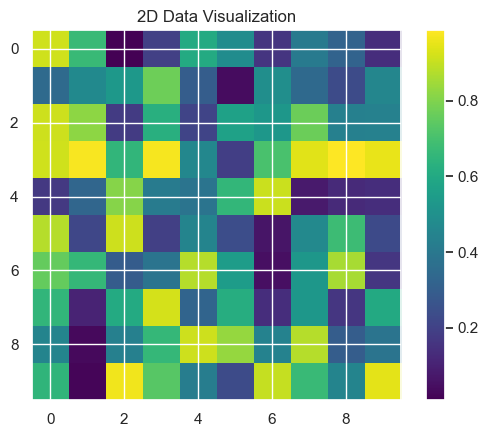

In [422]:
# Create a 2D array
data = np.random.rand(10, 10)

# Display the data as an image
plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.title('2D Data Visualization')
plt.show()

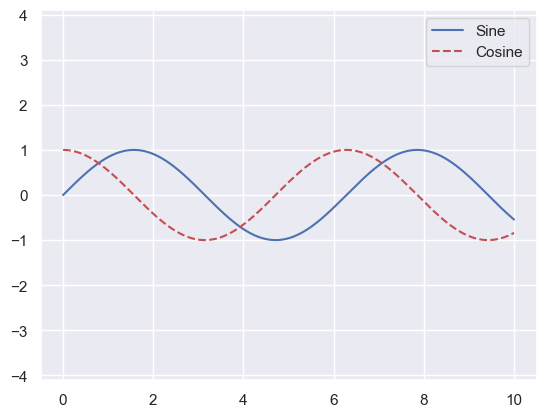

In [425]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')

ax.axis('equal')
ax.legend();

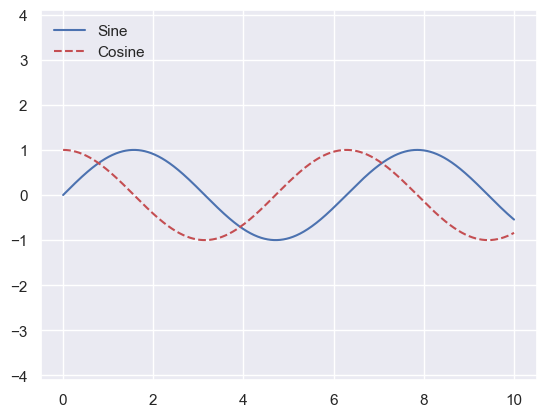

In [426]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')

ax.axis('equal')
ax.legend(loc='upper left', frameon=False); # turning off the frame results in disabling the box around the legends

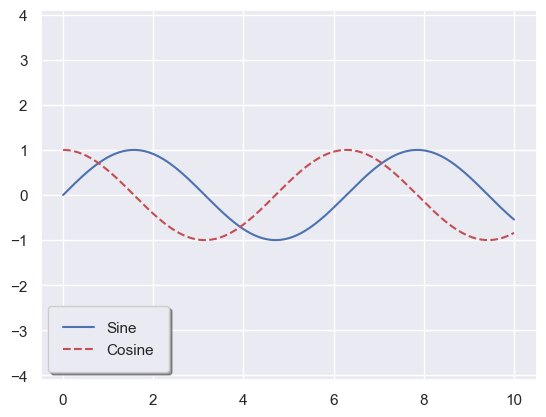

In [434]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')

ax.axis('equal')
ax.legend(loc='lower left', fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [438]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray', colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6,2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1673837818.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1673837818.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


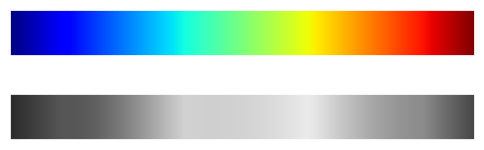

In [439]:
view_colormap('jet')

/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1673837818.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1673837818.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


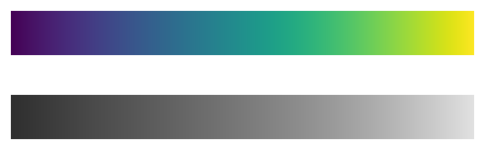

In [440]:
view_colormap('viridis')

/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1673837818.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1673837818.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


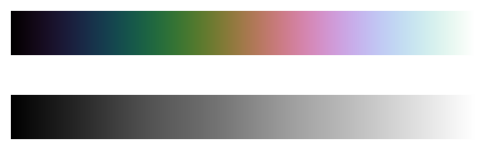

In [442]:
view_colormap('cubehelix')

In [452]:
x = np.arange(6).reshape(2, 3)

fl = x.flat
print(type(fl))

for item in x:
    print(item)
    
for item in fl:
    print(item)
    
fl[2:4]

<class 'numpy.flatiter'>
[0 1 2]
[3 4 5]
0
1
2
3
4
5


array([2, 3])

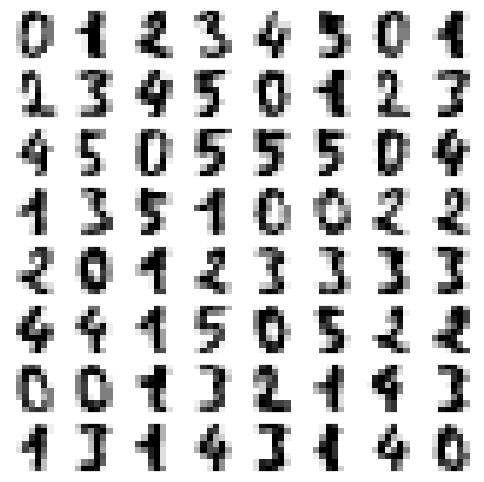

In [443]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [459]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/Users/nishantbabel/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/nishantbabel/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/721538444.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projection[:, 0], projection[: ,1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))


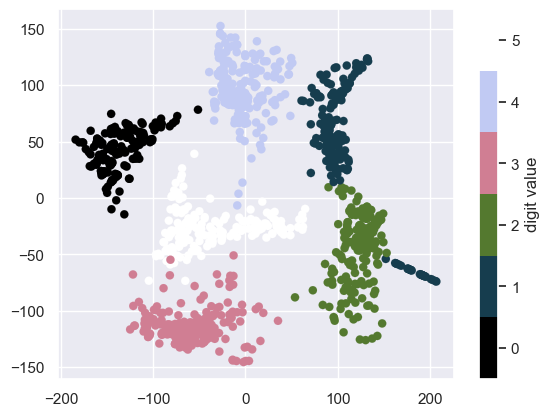

In [461]:
plt.scatter(projection[:, 0], projection[: ,1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

In [462]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    ax[0].hist(np.random.rand(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [463]:
IPython_default = plt.rcParams.copy()

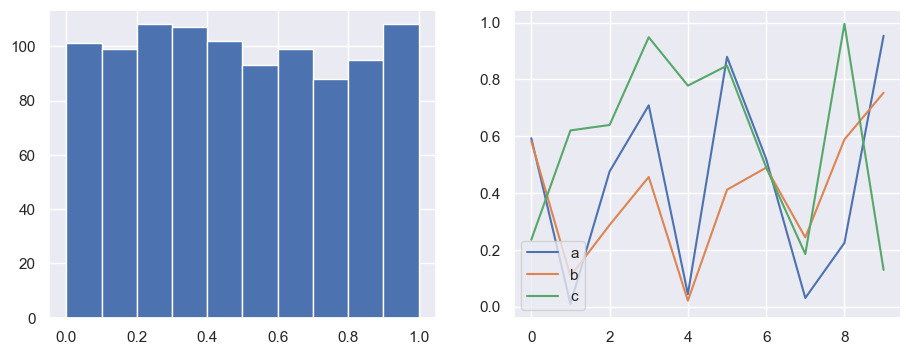

In [464]:
hist_and_lines() # default

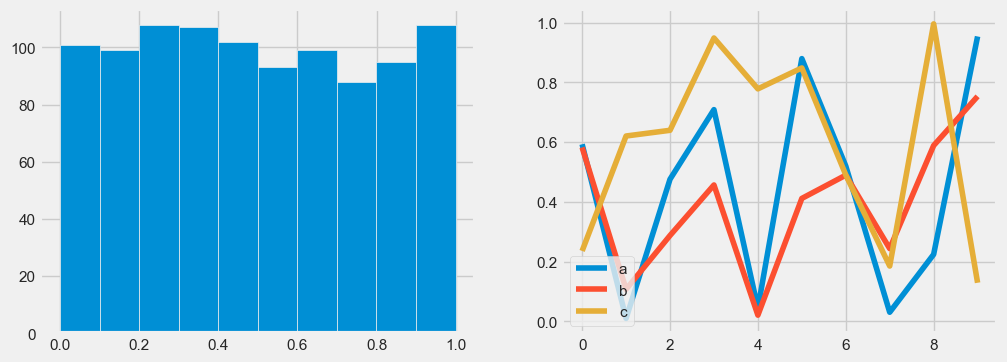

In [465]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

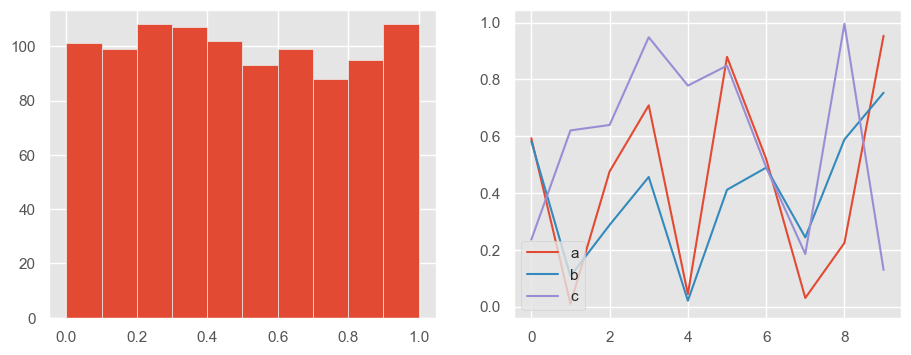

In [466]:
with plt.style.context('ggplot'):
    hist_and_lines()

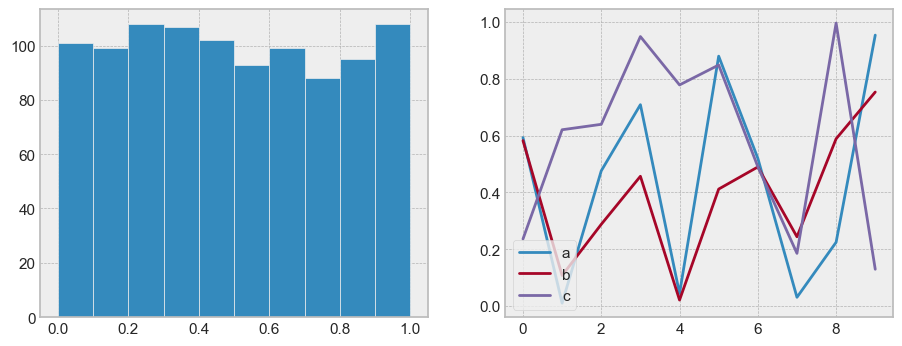

In [467]:
with plt.style.context('bmh'):
    hist_and_lines()

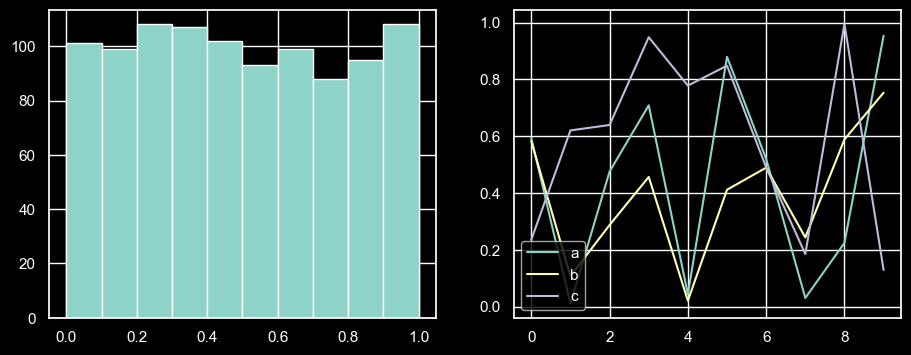

In [468]:
with plt.style.context('dark_background'):
    hist_and_lines()

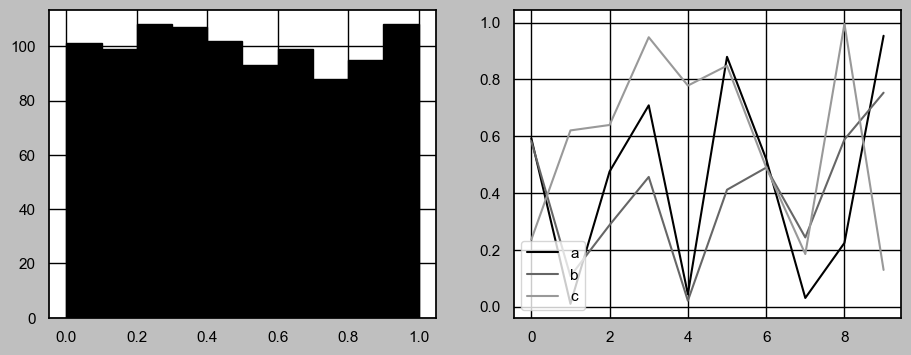

In [471]:
with plt.style.context('grayscale'):
    hist_and_lines()

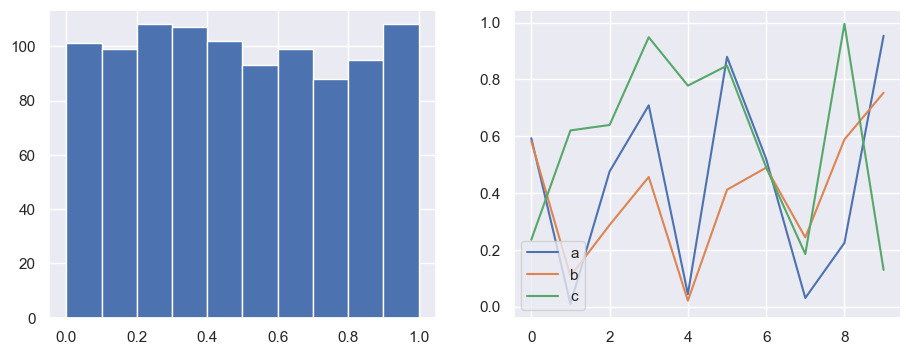

In [472]:
import seaborn
hist_and_lines()

In [473]:
from mpl_toolkits import mplot3d

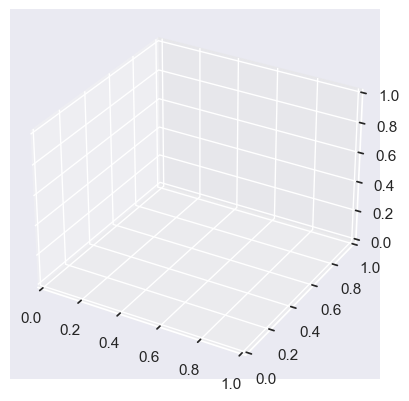

In [474]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [476]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

/Users/nishantbabel/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


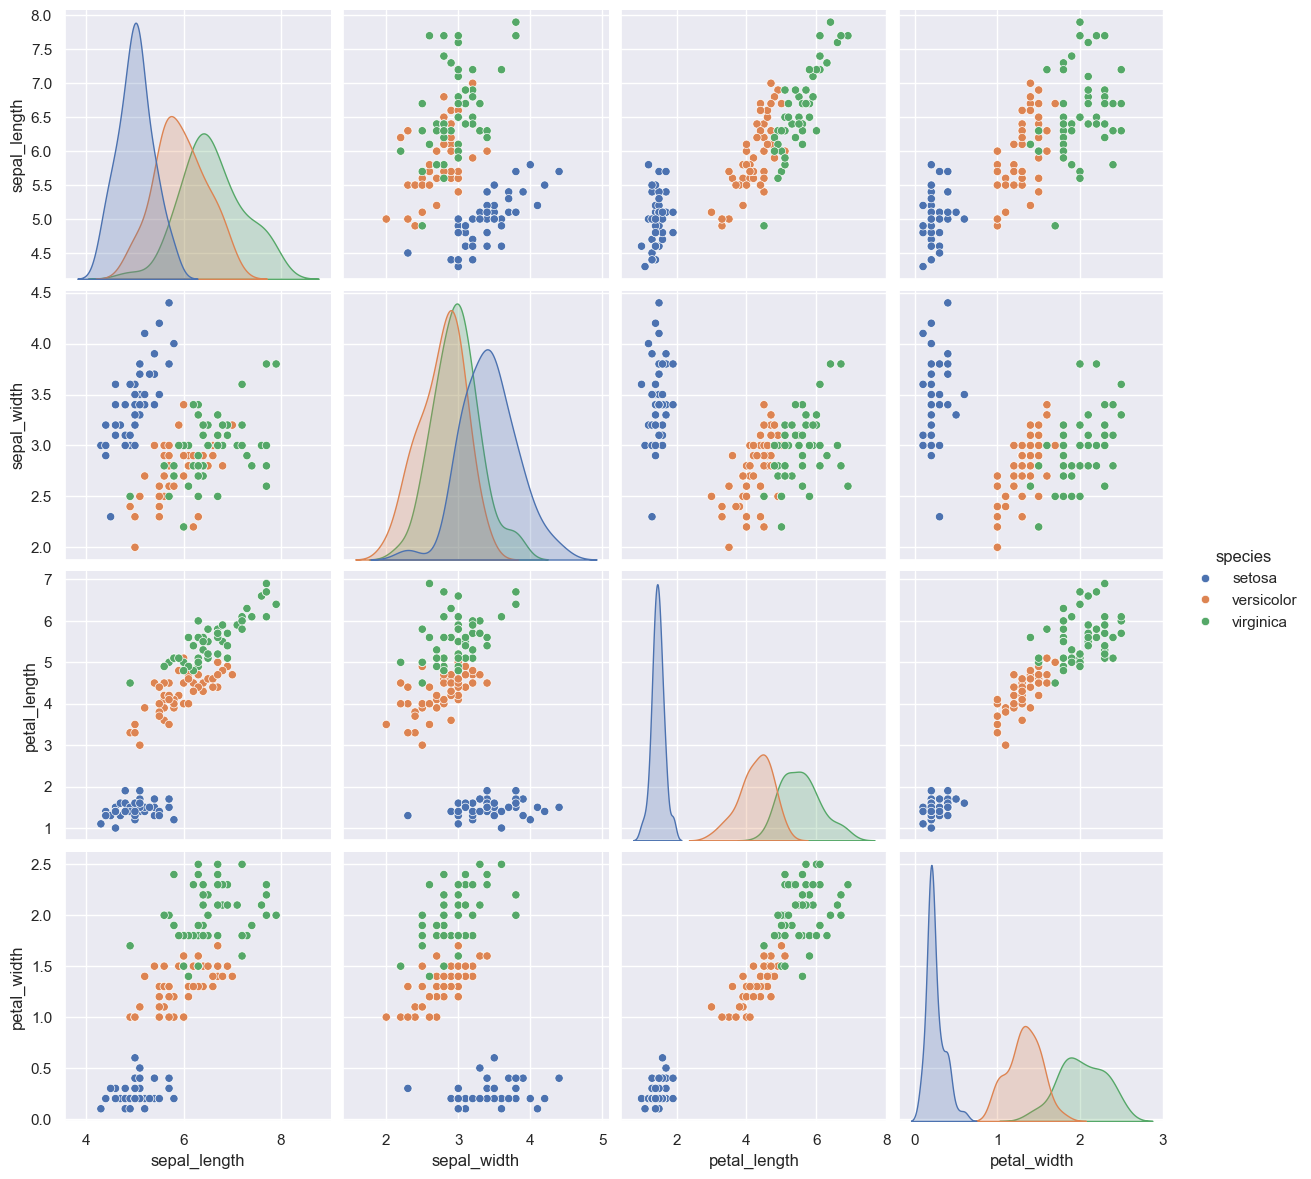

In [481]:
sns.pairplot(iris, hue='species', size=3)

In [485]:
X_iris

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [486]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [490]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [508]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [509]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)


0.9736842105263158

In [519]:
from sklearn.decomposition import PCA
model = PCA(n_components=3)
model.fit(X_iris)
X_3D = model.transform(X_iris)

iris['PCA1'] = X_3D[:, 0]
iris['PCA2'] = X_3D[:, 1]
iris['PCA3'] = X_3D[:, 2]
# sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=True)
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

         PCA1      PCA2      PCA3  
0   -2.684126  0.319397 -0.027915  
1   -2.714142 -0.177001 -0.210464  
2   -2.888991 -0.144949  0.017900  
3   -2.745343 -0.318299  0.031559  
4   -2.728717  0.326755  0.090079  
..        ...       ...       ...  
145  1.944110  0.187532  0.177825  
146  1.527167 -0.375317 -0.121898  
147  1.764346  0.078859  0.130482  
148  1.900942  0.116628  0.723252  
149  1.390189 -0.282661  0.362910  

[150 rows x 8 columns]

/var/folders/kc/4kd0hqq50fzggd1t6ntbxd8r0000gn/T/ipykernel_56689/1964099078.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(iris['PCA1'], iris['PCA2'], iris['PCA3'], cmap='viridis')


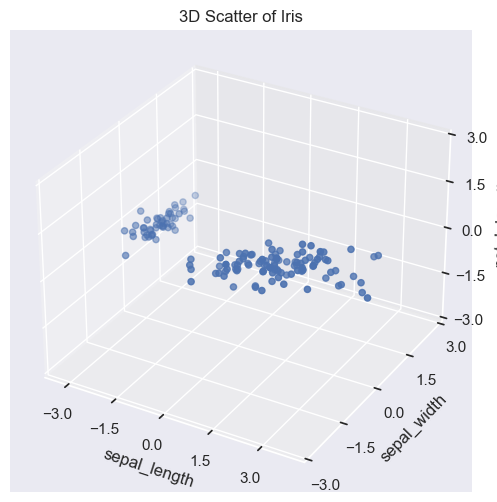

In [521]:
fig = plt.figure(figsize=(10,6 ))
ax = plt.axes(projection='3d')

# Plot 3D plot
ax.scatter3D(iris['PCA1'], iris['PCA2'], iris['PCA3'], cmap='viridis')

# Plot title of graph
plt.title(f'3D Scatter of Iris')

# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

In [542]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [543]:
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

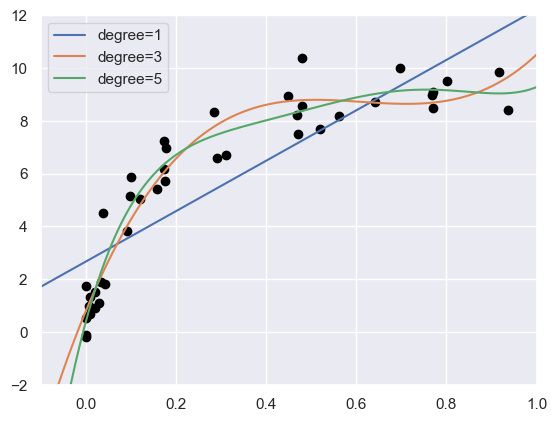

In [560]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f'degree={degree}')

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

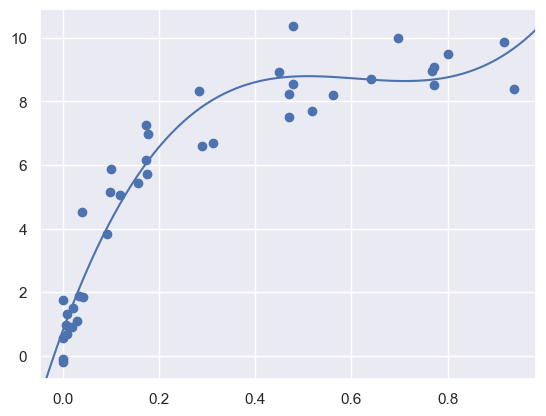

In [564]:
plt.scatter(X, y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test, y_test)
plt.axis(lim);

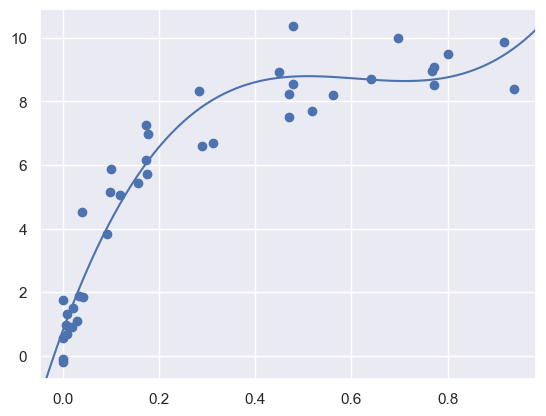

In [562]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim); # lim object is preserved to maintain the same axes for the plots

In [567]:
from sklearn.feature_extraction import DictVectorizer

# Sample data
data = [
    {'city': 'New York', 'temp': 20, 'humidity': 50},
    {'city': 'London', 'temp': 15, 'humidity': 60},
    {'city': 'Paris', 'temp': 18}
]
print(data)

# Sparse output (default)
vec_sparse = DictVectorizer(sparse=True)
X_sparse = vec_sparse.fit_transform(data)
print("Sparse output:")
print(X_sparse)
print(type(X_sparse))

# Dense output
vec_dense = DictVectorizer(sparse=False)
X_dense = vec_dense.fit_transform(data)
print("\nDense output:")
print(X_dense)
print(type(X_dense))

[{'city': 'New York', 'temp': 20, 'humidity': 50}, {'city': 'London', 'temp': 15, 'humidity': 60}, {'city': 'Paris', 'temp': 18}]
Sparse output:
  (0, 1)	1.0
  (0, 3)	50.0
  (0, 4)	20.0
  (1, 0)	1.0
  (1, 3)	60.0
  (1, 4)	15.0
  (2, 2)	1.0
  (2, 4)	18.0
<class 'scipy.sparse._csr.csr_matrix'>

Dense output:
[[ 0.  1.  0. 50. 20.]
 [ 1.  0.  0. 60. 15.]
 [ 0.  0.  1.  0. 18.]]
<class 'numpy.ndarray'>


In [568]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [596]:
y.sort()
set(y)

{'evil', 'horizon', 'of', 'problem', 'queen'}

In [587]:
y = [x for i in [i.split() for i in sample] for x in i]
counts = {}
for word in y:
#     print(word)
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1
#     print(counts)

counts
    

{'problem': 2, 'of': 1, 'evil': 2, 'queen': 1, 'horizon': 1}

In [573]:
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]])

In [598]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

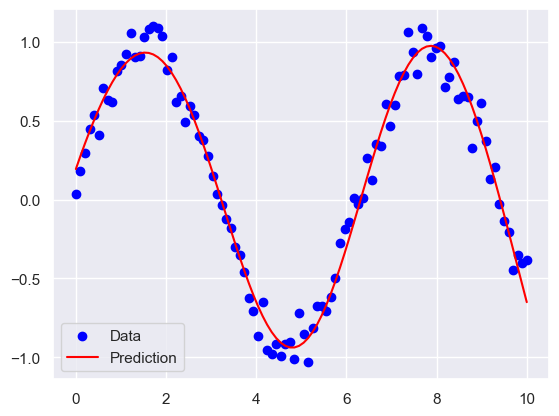

In [611]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

def gaussian_basis(X, centers, width):
    return np.exp(-0.5 * ((X - centers.reshape(1, -1)) / width)**2)

# Generate data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X.ravel()) + 0.1 * np.random.randn(100)

# Define basis functions
centers = np.linspace(0, 10, 5).reshape(-1, 1)
width = 2.0

# Transform features
transformer = FunctionTransformer(lambda x: gaussian_basis(x, centers, width))
X_transformed = transformer.fit_transform(X)

# Fit linear regression
model = LinearRegression()
model.fit(X_transformed, y)

# Predict
y_pred = model.predict(X_transformed)

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()

(-1.0, 3.5)

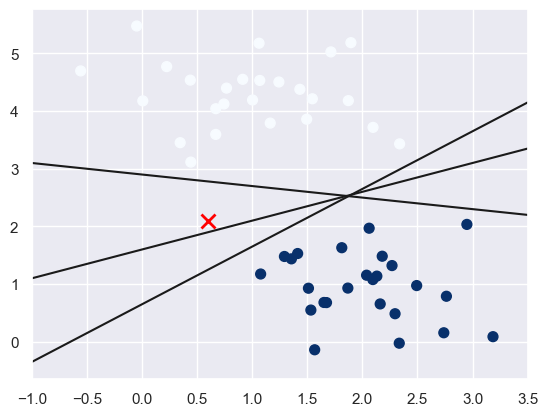

In [661]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Blues')

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, "-k")

plt.xlim(-1, 3.5)

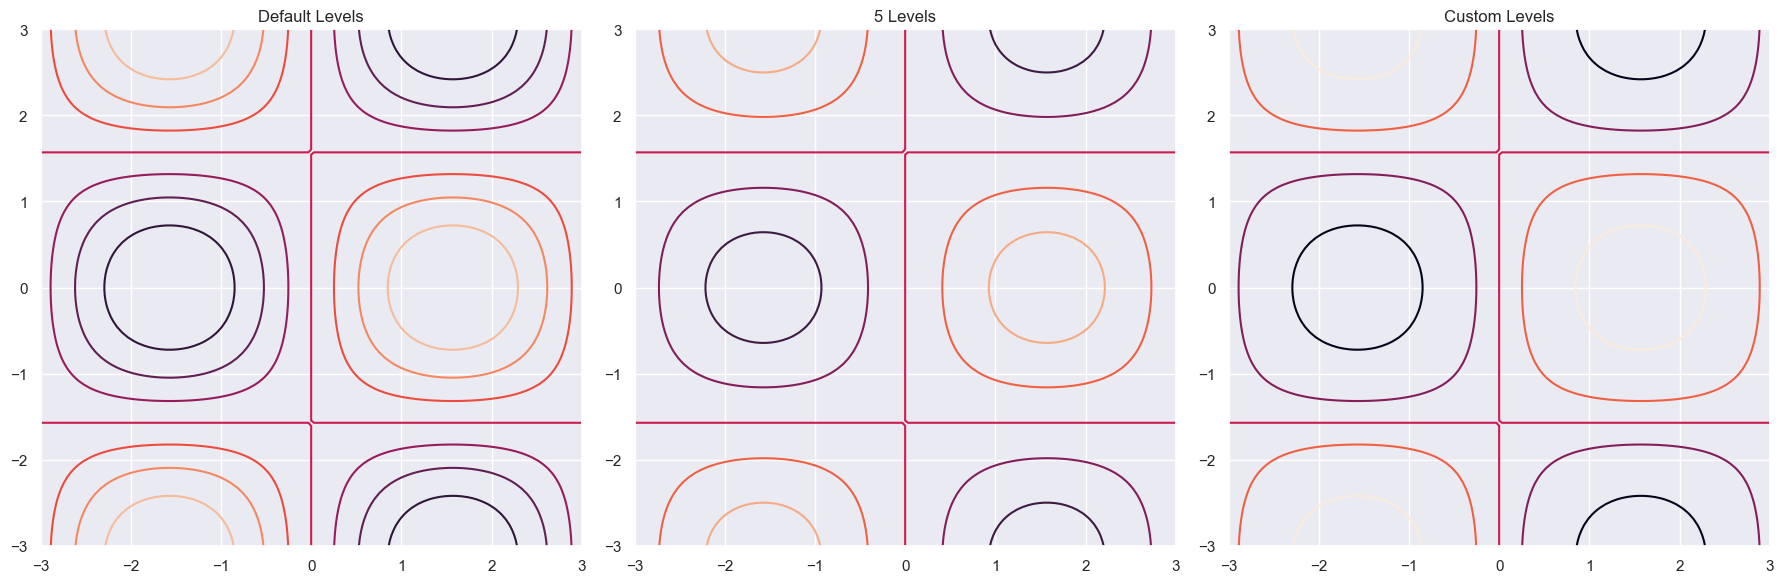

In [668]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Default levels
c1 = ax1.contour(X, Y, Z)
ax1.set_title('Default Levels')

# Specific number of levels
c2 = ax2.contour(X, Y, Z, levels=5)
ax2.set_title('5 Levels')

# Custom levels
custom_levels = [-0.75, -0.25, 0, 0.25, 0.75]
c3 = ax3.contour(X, Y, Z, levels=custom_levels)
ax3.set_title('Custom Levels')

# Add colorbars
# fig.colorbar(c1, ax=ax1)
# fig.colorbar(c2, ax=ax2)
# fig.colorbar(c3, ax=ax3)

plt.tight_layout()
plt.show()

In [677]:
np.exp(-(X ** 2)).sum(1)

array([29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24495844,
       29.24495844, 29.24495844, 29.24495844, 29.24495844, 29.24

In [700]:
np.c_?

In [702]:
plt.contourf?

In [703]:
n_classes = 4
np.arange(n_classes + 1) - 0.5

array([-0.5,  0.5,  1.5,  2.5,  3.5])

In [704]:
import helpers_05_08

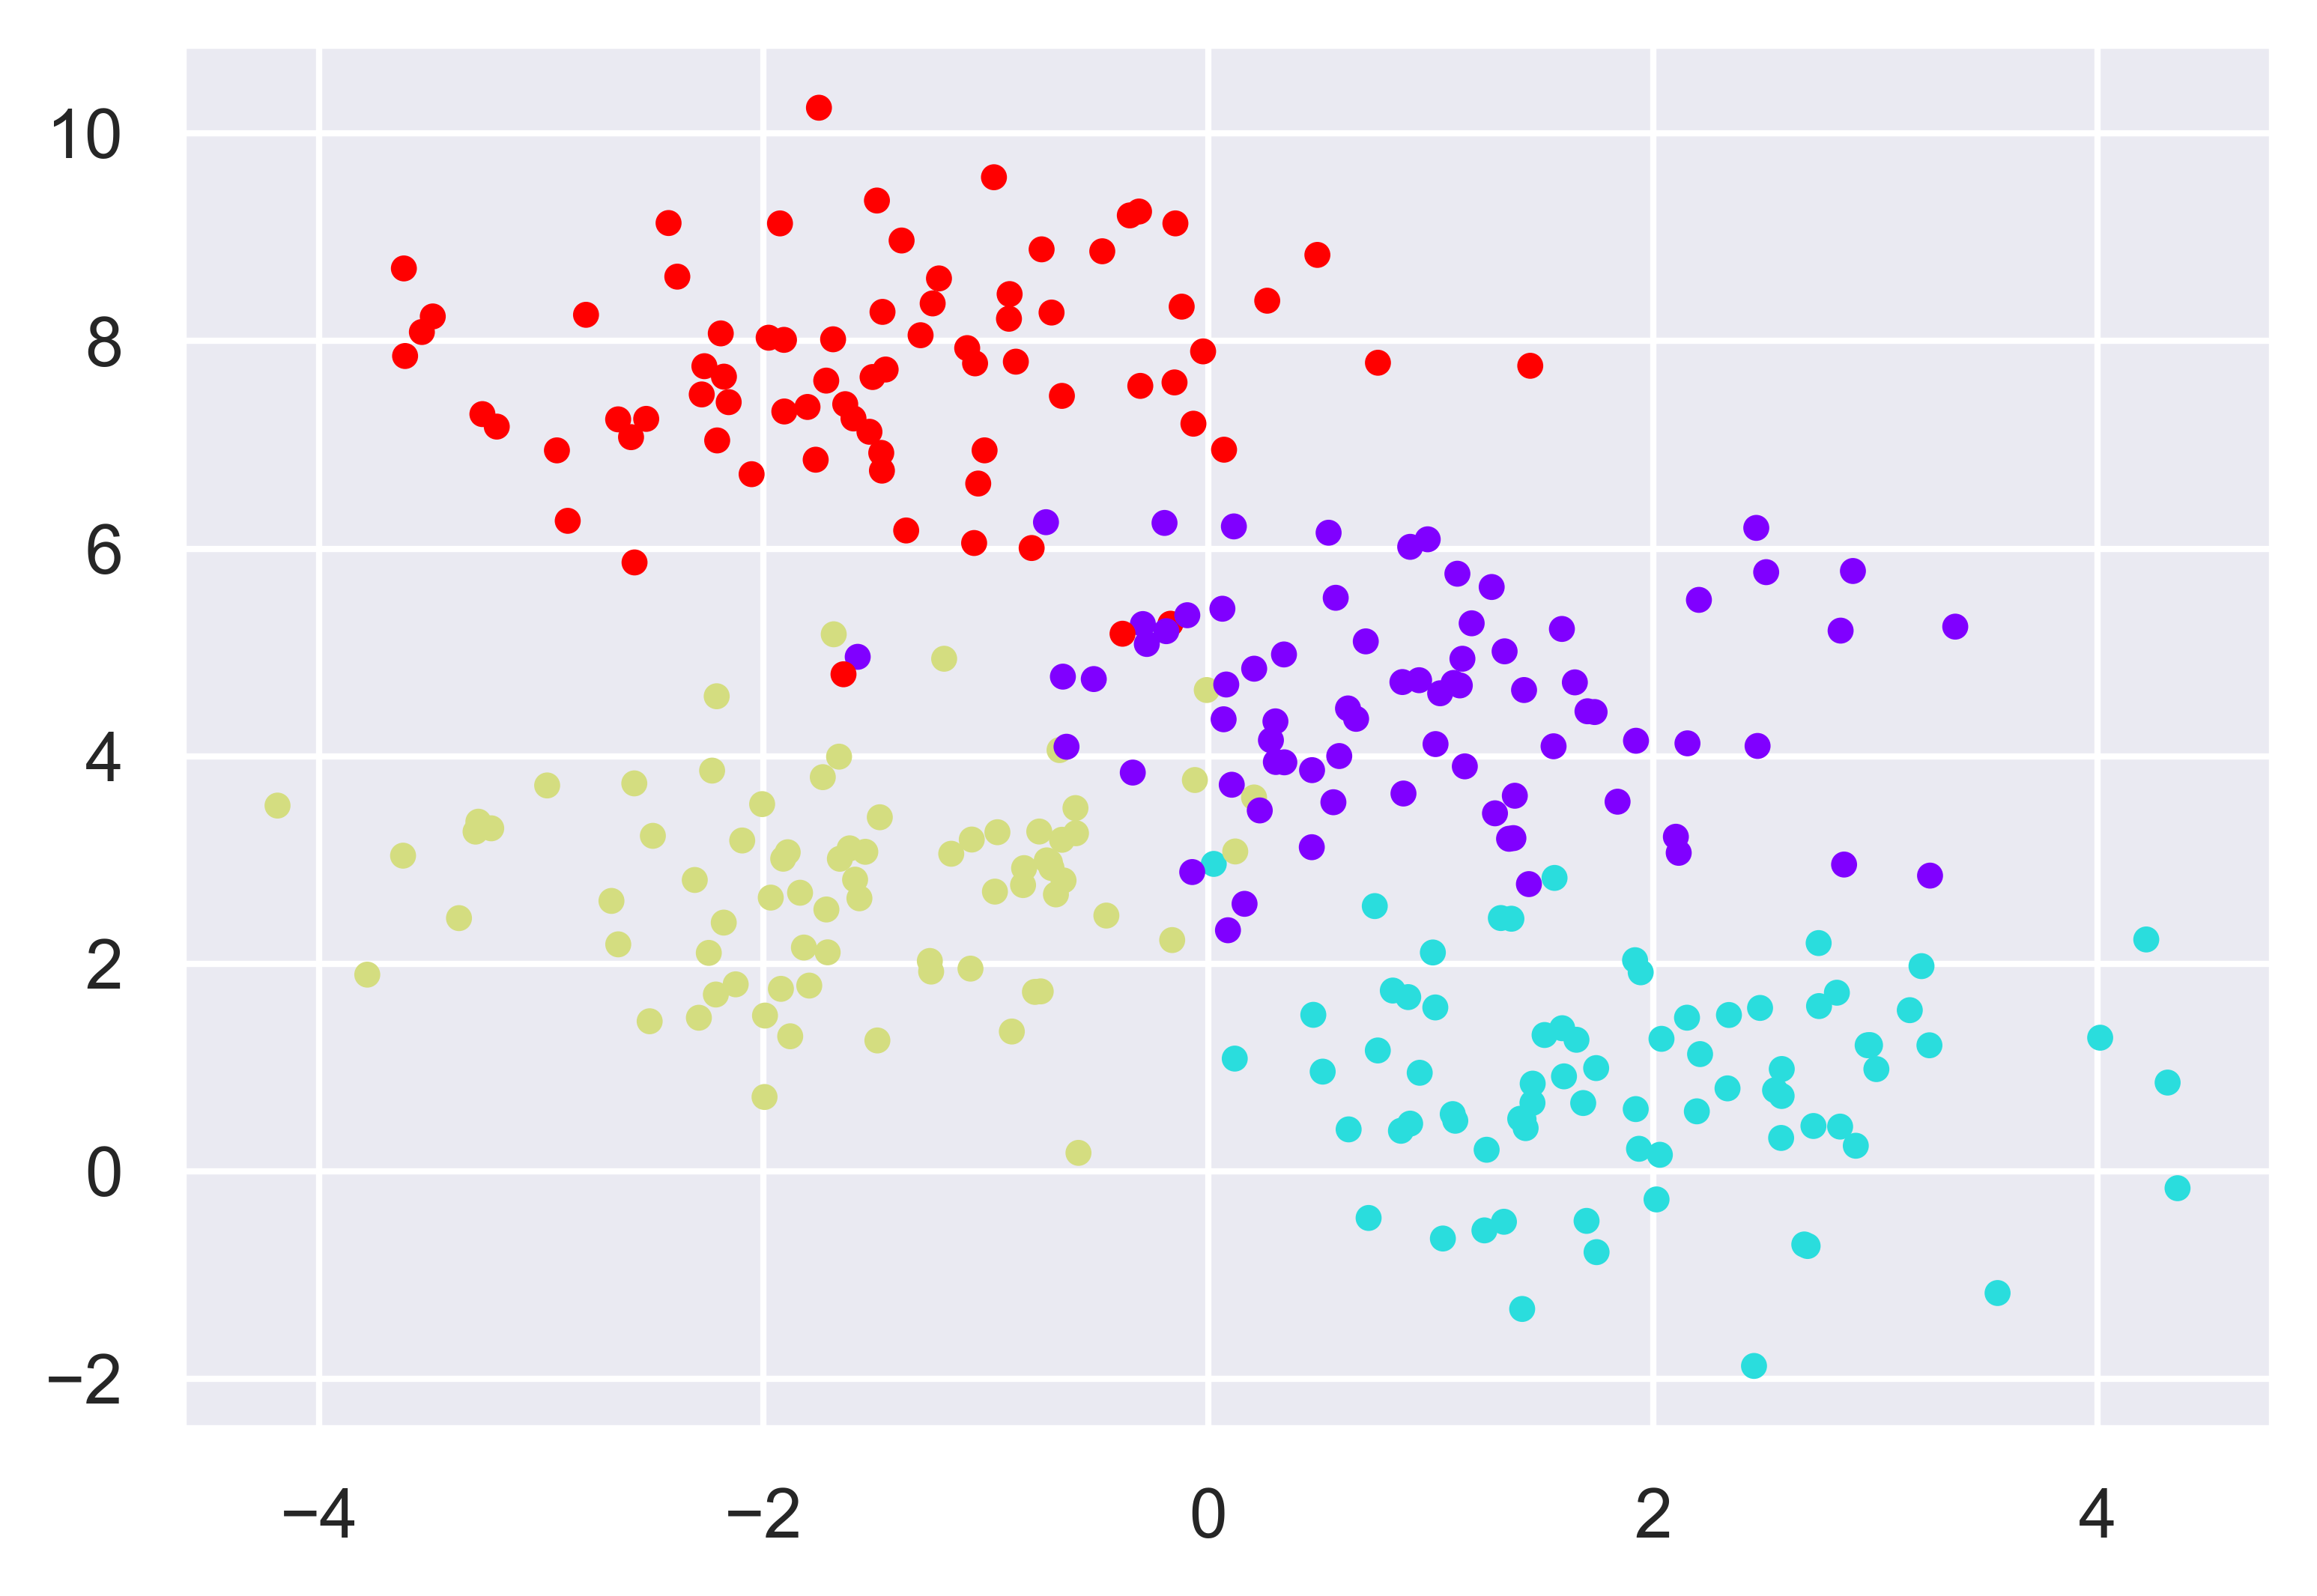

In [740]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow')
# plt.axes()

In [741]:
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(IntSlider(value=5, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

In [742]:
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(IntSlider(value=0, description='random_state'), Output()), _dom_classes=('widget-interac…

In [743]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

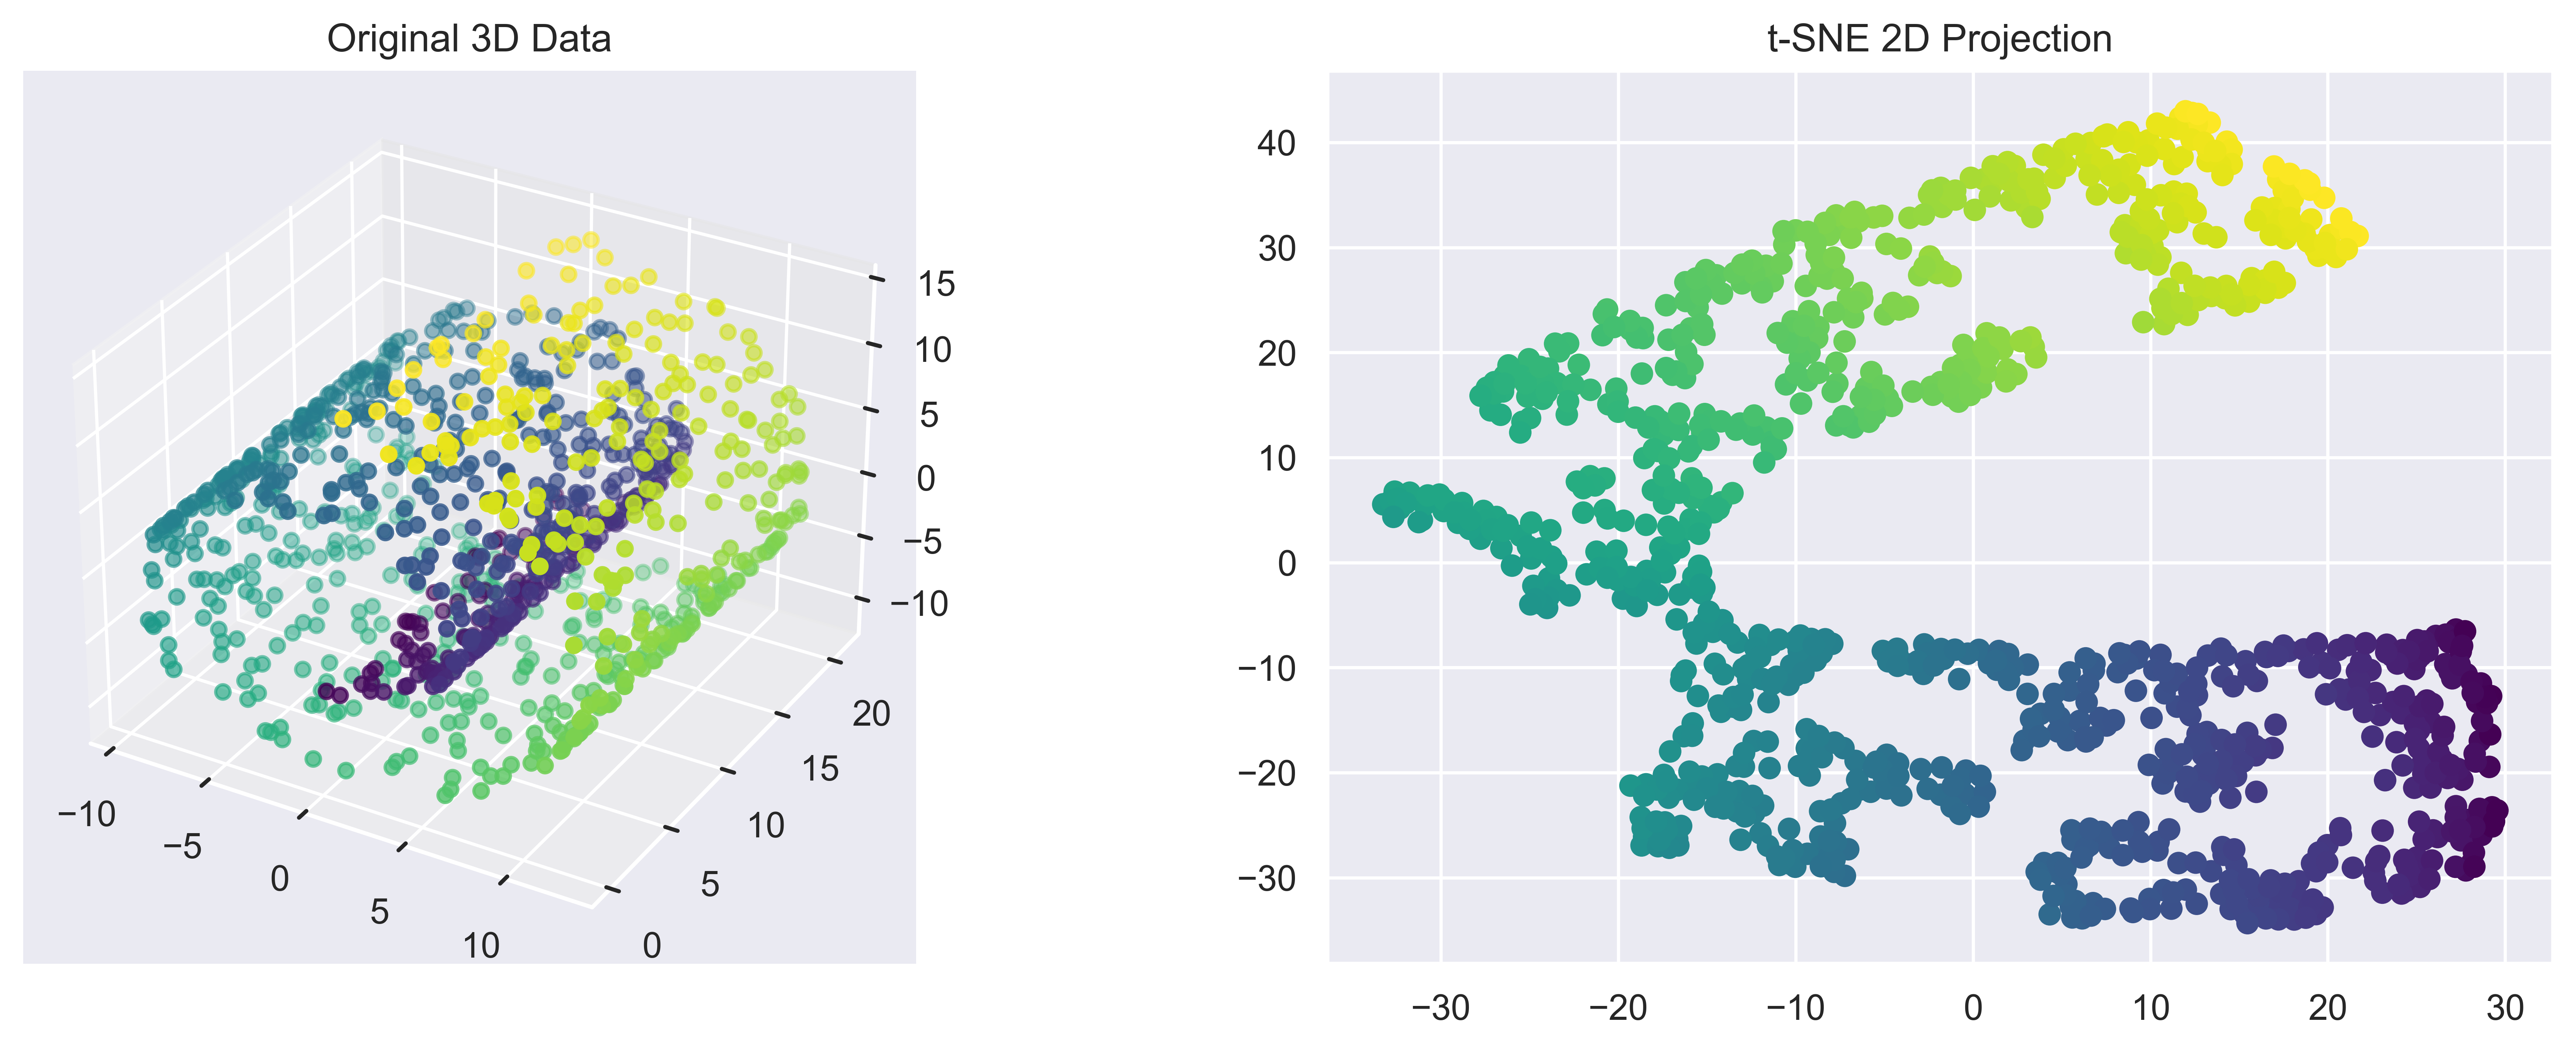

In [745]:
#t-sne for manifold learning

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Generate a "Swiss roll" dataset
n_points = 1000
t = 1.5 * np.pi * (1 + 2 * np.random.rand(n_points))
x = t * np.cos(t)
y = 21 * np.random.rand(n_points)
z = t * np.sin(t)

# Combine into a 3D dataset
X = np.column_stack((x, y, z))

# Apply t-SNE for manifold learning
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# Plotting
fig = plt.figure(figsize=(15, 5))

# Original 3D data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=t, cmap='viridis')
ax1.set_title("Original 3D Data")

# t-SNE 2D projection
ax2 = fig.add_subplot(122)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=t, cmap='viridis')
ax2.set_title("t-SNE 2D Projection")

plt.show()

In [759]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
X = X[:, ::-1] # flip the axes for better plotting

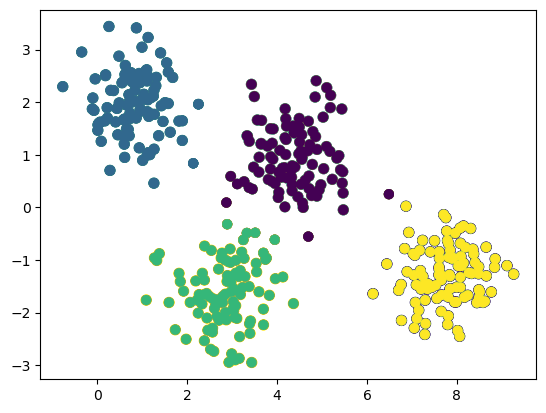

In [770]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show();

In [751]:
probs = gmm.predict_proba(X)

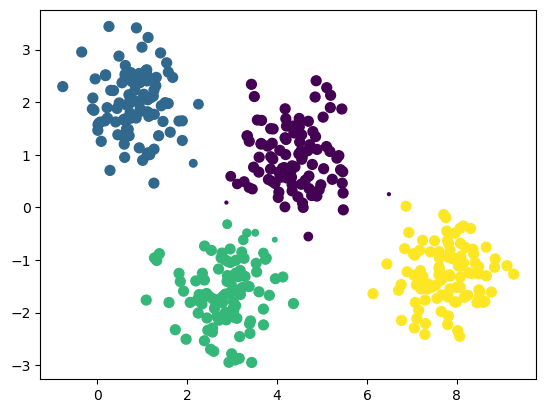

In [771]:
size = 50 * probs.max(1) ** 4
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);